# Exploratory Data Analysis
Using Pandas!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sn
pd.set_option('display.max_columns', 30)

C:\Users\sibiy\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Step 0: Imports and Reading Data

In [2]:
df = pd.read_csv("supply_chain_data.csv")

## Step 1: Data Understanding
- Dataframe `shape`
- `head` 
- `info`
- `describe`
- `Sum null values`

In [3]:
df.shape

(100, 24)

**This dataset has 100 rows and 24 columns.**

In [4]:
#Prints the first 5 rows
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [5]:
# Returns all columns in the dataset
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [6]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [7]:
#calculates the statistics of numeric columns
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [8]:
#Calculates null values in each column
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

# Step 2: Data Preparation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns


In [9]:
#Dropping irrelevant columns
df1 = df[[
        'Product type', 'SKU', 'Price', 'Availability','Number of products sold', 'Revenue generated', 'Customer demographics',
        #'Stock levels', 'Lead times', 
        'Order quantities', 
        #'Shipping times', 'Shipping carriers', 
        'Shipping costs', #'Supplier name', 
        'Location',
        #'Lead time', 'Production volumes', 'Manufacturing lead time',
        'Manufacturing costs', 
        #'Inspection results', 'Defect rates', #'Transportation modes', 'Routes', 'Costs'
        ]].copy()
df1.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Order quantities,Shipping costs,Location,Manufacturing costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,96,2.956572,Mumbai,46.279879
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,37,9.716575,Mumbai,33.616769
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,88,8.054479,Mumbai,30.688019
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,59,1.729569,Kolkata,35.624741
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,56,3.890548,Delhi,92.065161


In [10]:
#Returns duplicate rows
df1.loc[df1.duplicated()]

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Order quantities,Shipping costs,Location,Manufacturing costs


**This shows that there are no duplicates in our dataset.**

In [11]:
#Describe the sliced dataset
df1.describe()

,Price,Availability,Number of products sold,Revenue generated,Order quantities,Shipping costs,Manufacturing costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,49.220000,5.548149,47.266693
std,31.168193,30.743317,303.780074,2732.841744,26.784429,2.651376,28.982841
min,1.699976,1.000000,8.000000,1061.618523,1.000000,1.013487,1.085069
25%,19.597823,22.750000,184.250000,2812.847151,26.000000,3.540248,22.983299
50%,51.239831,43.500000,392.500000,6006.352023,52.000000,5.320534,45.905622
75%,77.198228,75.000000,704.250000,8253.976921,71.250000,7.601695,68.621026
max,99.171329,100.000000,996.000000,9866.465458,96.000000,9.929816,99.466109


In [12]:
#Rename columns to include units
df1 = df1.rename( columns= {'Price':'Price($)', 'Revenue generated': 'Revenue generated($)',
                     'Shipping costs': 'Shipping costs($)', 'Manufacturing costs':'Manufacturing costs($)'})

# Step 3: Feature Understanding
(Univariate analysis)

- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

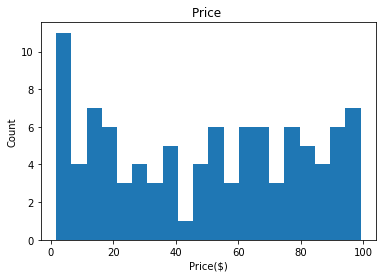

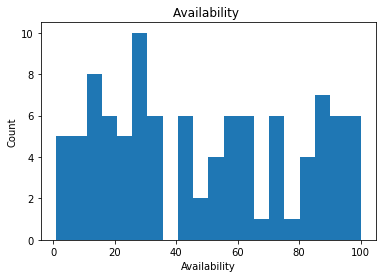

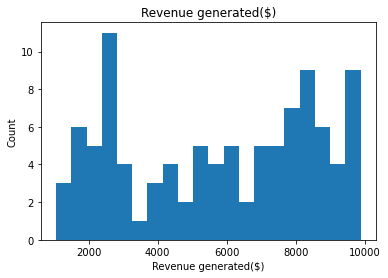

In [14]:
#We plot histograms for selected columns
plt.hist(df1['Price($)'], bins = 20)
plt.xlabel("Price($)")
plt.ylabel("Count")
plt.title("Price ")
plt.show()

plt.hist(df1['Availability'], bins = 20)
plt.xlabel("Availability")
plt.ylabel("Count")
plt.title("Availability ")
plt.show()

plt.hist(df1['Revenue generated($)'], bins = 20)
plt.xlabel('Revenue generated($)')
plt.ylabel("Count")
plt.title('Revenue generated($)')
plt.show()

# Step 4: Feature Relationships


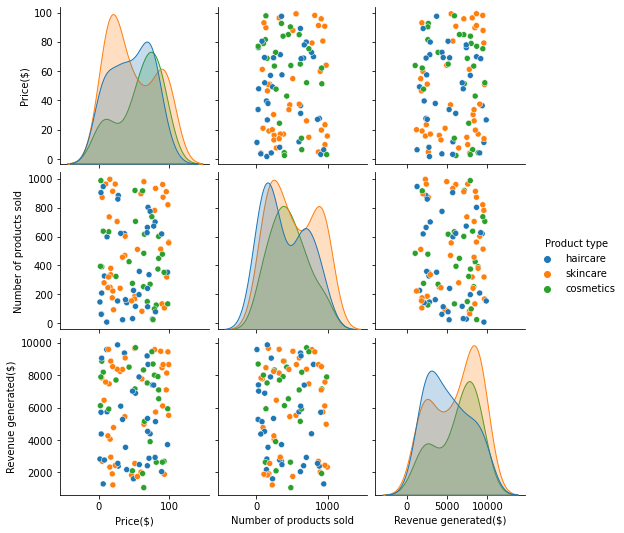

In [15]:
sn.pairplot(df1,
             vars=[
                   'Price($)','Number of products sold','Revenue generated($)'],
            hue='Product type')
plt.show()

# Step 5: Answer the following questions.


**Question:** What is the revenue generated from each location?

In [107]:
df1.Location.unique()

array(['Mumbai', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai'], dtype=object)

In [108]:
df1.Location.value_counts()

Kolkata      25
Mumbai       22
Chennai      20
Bangalore    18
Delhi        15
Name: Location, dtype: int64

In [16]:
df1.groupby('Location')['Revenue generated($)'].agg('sum')

Location
Bangalore    102601.723882
Chennai      119142.815748
Delhi         81027.701225
Kolkata      137077.551005
Mumbai       137755.026877
Name: Revenue generated($), dtype: float64

In [17]:
Total_revenue = df1['Revenue generated($)'].sum()
Total_revenue

577604.8187380086

In [19]:
#Express revenue generated in each location by percentage
df2 = df1.groupby('Location')['Revenue generated($)'].agg('sum').apply( lambda x : x*100/Total_revenue)
df2


Location
Bangalore    17.763308
Chennai      20.627047
Delhi        14.028225
Kolkata      23.732065
Mumbai       23.849356
Name: Revenue generated($), dtype: float64

From the above analysis, we observe that the revenue generated from product sales is distributed as follows:
- 17.76% from Bangalore,
- 20.62% from Chennai,    
- 14.03% from Delhi,         
- 23.73% from Kolkata, and   
- 23.85% from Mumbai.     

**Question:** What is the relationship between price and the number of products sold?

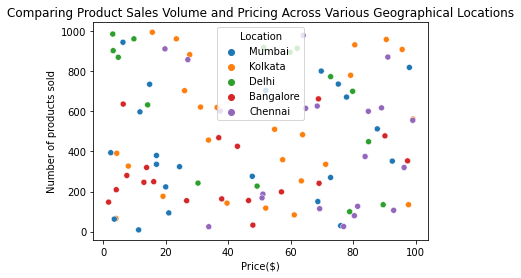

In [20]:
sn.scatterplot(x= 'Price($)', y="Number of products sold",hue= 'Location',data =df1)
plt.title("Comparing Product Sales Volume and Pricing Across Various Geographical Locations")
plt.show()

The relationship between price and product sales volume appears unclear across different geographical locations.

**Question**: Which product type generates the most revenue?

In [21]:
df3 = pd.DataFrame(df1.groupby('Product type')['Revenue generated($)'].agg('sum'))
df3['Revenue generated (%)'] = df3['Revenue generated($)'].apply(lambda x : x*100/Total_revenue)
df3

,Revenue generated($),Revenue generated (%)
Product type,,
cosmetics,161521.265999,27.963975
haircare,174455.390605,30.203244
skincare,241628.162133,41.832782


According to the table above, it can be inferred that  skincare generate the highest revenue, accounting for 41.83 % of the total revenue. However, may we assert this proposition for every geographical location?

In [22]:
df4 = pd.DataFrame(df1.groupby(['Product type','Location'])['Revenue generated($)'].agg('sum'))
df4['Revenue generated (%)'] = df4['Revenue generated($)'].apply(lambda x : x*100/Total_revenue)
df4

Revenue generated($)  Revenue generated (%)
Product type Location                                              
cosmetics    Bangalore          19309.562880               3.343040
             Chennai            31461.947457               5.446968
             Delhi              37429.677331               6.480153
             Kolkata            24163.571855               4.183409
             Mumbai             49156.506477               8.510404
haircare     Bangalore          51654.345696               8.942852
             Chennai            28723.448932               4.972855
             Delhi              14625.900767               2.532164
             Kolkata            35027.713247               6.064304
             Mumbai             44423.981964               7.691068
skincare     Bangalore          31637.815307               5.477415
             Chennai            58957.419359              10.207224
             Delhi              28972.123128               5.015907
             Kolkata            77886.265903              13.484352
             Mumbai             44174.538437               7.647883

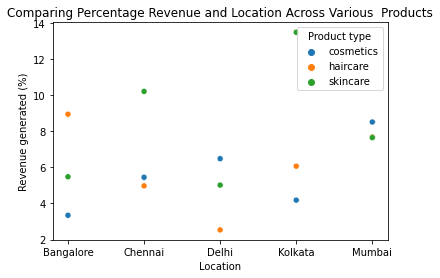

In [23]:
sn.scatterplot(x= 'Location', y= 'Revenue generated (%)',hue= 'Product type',data= df4)
plt.title("Comparing Percentage Revenue and Location Across Various  Products")
plt.show()

Upon analyzing the data, it is evident that the distribution of revenue across different product categories varies among the observed cities. Specifically:

- In Bangalore, the predominant revenue comes from haircare products.
- Chennai's revenue is primarily driven by skincare products.
- The highest revenue in Delhi is attributed to cosmetics.
- Skincare products contribute significantly to revenue in Kolkata.
- Mumbai's revenue is predominantly generated from cosmetics sales.



